# Data import
Uploading the files and importing the required libraries to get the data

In [3]:
from google.colab import files
uploaded = files.upload()


Saving als_data.csv to als_data (1).csv


In [4]:
import pandas as pd

# Assuming the uploaded file is a CSV (for example, 'data.csv')
als = pd.read_csv('als_data.csv')

# Display the first few rows of the DataFrame
print ("First few rows of dataframe\n")
als.head()

First few rows of dataframe



,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


# Identifying and removing irrelevant data

Removing both the ID and SubjectID, as they would not contain any information about ALS condition.  
ID is just an increasing number and Subject ID is the unique number given to the patient.

In [5]:
als_drop = als.drop(columns=['ID','SubjectID'])
als_drop.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


Highly correlated variables should not be present in Kmeans algorithm.  
Plotting a heatmap for correlation coeffecient and from the below map, not many variables are found which are highly correlated

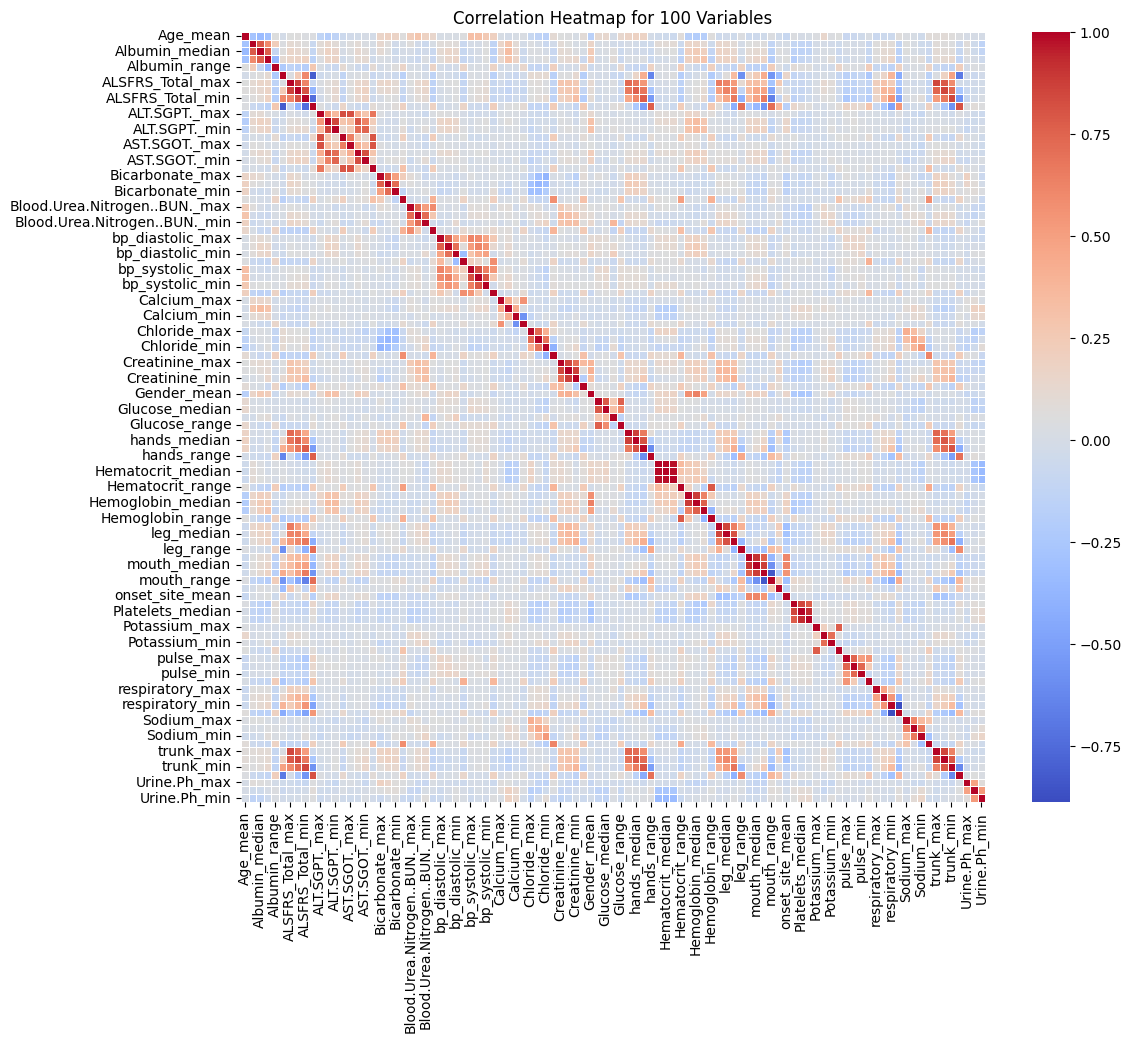

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = als_drop.corr()
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
# Display the correlation matrix
plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for 100 Variables")
plt.show()

# Standard scaler

Standardize features by removing the mean and scaling to unit variance.  It also converts the dataset to standard normally distributed data.   
This is being done, as distance based algorithms are sensitive to the magnitude of data.  
We cannot have variables with huge numerical difference in them.  

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Initialize the Standard Scaler
scaler = StandardScaler()

# Apply the scaler
als_scaled = scaler.fit_transform(als_drop)
als_scaled


array([[ 0.91713698,  3.08941722, -1.30078105, ..., -0.88037551,
         0.46305355,  1.86853157],
       [-0.57487867, -0.62201561, -1.11240084, ...,  0.1926645 ,
        -1.13720768, -0.41915124],
       [-1.45253494,  0.92441474,  1.14816173, ..., -0.88037551,
        -1.13720768, -0.41915124],
       ...,
       [-0.6626443 , -0.31272954,  0.01788044, ...,  2.33874452,
         0.46305355, -0.41915124],
       [-1.54030057,  0.61512867,  0.01788044, ..., -0.88037551,
        -1.13720768, -0.41915124],
       [-0.57487867,  0.3058426 ,  0.39464087, ..., -1.95341552,
        -1.13720768, -0.41915124]])

In [8]:
print("The parameters used in standard scaler are\n",scaler.get_params(),'\n\n')
print("The features used in standard scaler are\n",scaler.get_feature_names_out())


The parameters used in standard scaler are
 {'copy': True, 'with_mean': True, 'with_std': True} 


The features used in standard scaler are
 ['Age_mean' 'Albumin_max' 'Albumin_median' 'Albumin_min' 'Albumin_range'
 'ALSFRS_slope' 'ALSFRS_Total_max' 'ALSFRS_Total_median'
 'ALSFRS_Total_min' 'ALSFRS_Total_range' 'ALT.SGPT._max'
 'ALT.SGPT._median' 'ALT.SGPT._min' 'ALT.SGPT._range' 'AST.SGOT._max'
 'AST.SGOT._median' 'AST.SGOT._min' 'AST.SGOT._range' 'Bicarbonate_max'
 'Bicarbonate_median' 'Bicarbonate_min' 'Bicarbonate_range'
 'Blood.Urea.Nitrogen..BUN._max' 'Blood.Urea.Nitrogen..BUN._median'
 'Blood.Urea.Nitrogen..BUN._min' 'Blood.Urea.Nitrogen..BUN._range'
 'bp_diastolic_max' 'bp_diastolic_median' 'bp_diastolic_min'
 'bp_diastolic_range' 'bp_systolic_max' 'bp_systolic_median'
 'bp_systolic_min' 'bp_systolic_range' 'Calcium_max' 'Calcium_median'
 'Calcium_min' 'Calcium_range' 'Chloride_max' 'Chloride_median'
 'Chloride_min' 'Chloride_range' 'Creatinine_max' 'Creatinine_median'
 'Creatin

# Optimal number for k

The Silhoutte score and the WCSS has been calculated as shown below.  
It has been found out that Silhoutte score is high when we have k as 2.
But the same thing is not confirmed by WCSS,  it says K = 20 would be more optimum.  
This difference is because, when we increase the k, inertia will always be decreased.  That would not be a good indicator here.  
However, silhoutte score will decrease if clusters become too small or if adding more clusters causes overlap or poor separation between clusters.  Silhoutte score will appropriately be penalized for increase or decrease in number of clusters.  
Because of this fact, I am considering silhoutte score as a better indicator.  

Moreover, the silhoutte score is better suited for clusters with abnormal shape.  Hence, going by the below graph of silhoutte score, I am choosing the k value of 2,as that gives the highest score of 0.078.

In [9]:
import warnings
from sklearn.cluster import KMeans

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,12,14,16,18,20]
silhouette_scores=[]

for n_clusters in range_n_clusters:
   clusterer = KMeans(n_clusters=n_clusters, random_state=10)
   cluster_labels = clusterer.fit_predict(als_scaled)
   silhouette_avg = silhouette_score(als_scaled, cluster_labels)
   print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
        )
   silhouette_scores.append(silhouette_avg)



For n_clusters = 2 The average silhouette_score is : 0.07887730960924653
For n_clusters = 3 The average silhouette_score is : 0.06842887369754291
For n_clusters = 4 The average silhouette_score is : 0.05054399140251624
For n_clusters = 5 The average silhouette_score is : 0.07575537364619274
For n_clusters = 6 The average silhouette_score is : 0.04576725915997827
For n_clusters = 7 The average silhouette_score is : 0.05229594188929105
For n_clusters = 8 The average silhouette_score is : 0.05208743724226927
For n_clusters = 9 The average silhouette_score is : 0.05035265209534877
For n_clusters = 10 The average silhouette_score is : 0.04415623627512146
For n_clusters = 12 The average silhouette_score is : 0.047035033412684474
For n_clusters = 14 The average silhouette_score is : 0.039212379034715646
For n_clusters = 16 The average silhouette_score is : 0.031041358345321738
For n_clusters = 18 The average silhouette_score is : 0.03788496115463609
For n_clusters = 20 The average silhouette_

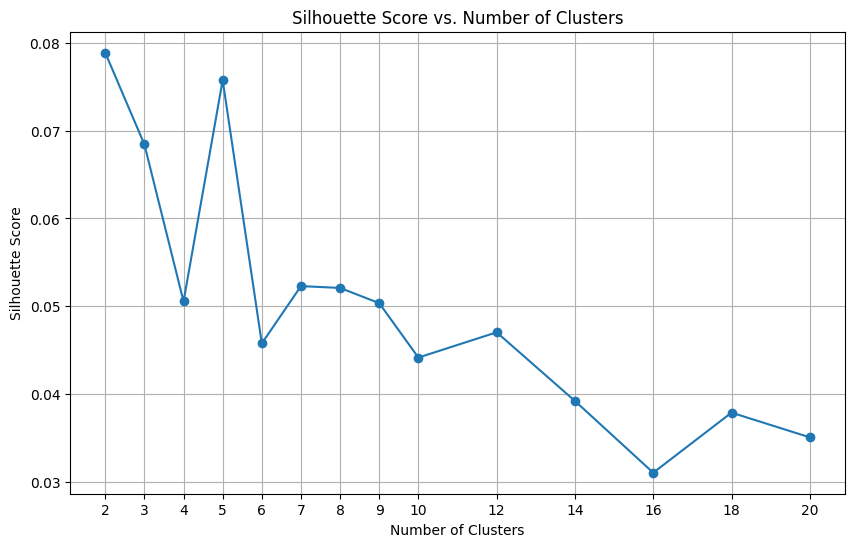

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.07887730960924653
For n_clusters = 3 The average silhouette_score is : 0.06842887369754291
For n_clusters = 4 The average silhouette_score is : 0.05054399140251624
For n_clusters = 5 The average silhouette_score is : 0.07575537364619274
For n_clusters = 6 The average silhouette_score is : 0.04576725915997827
For n_clusters = 7 The average silhouette_score is : 0.05229594188929105
For n_clusters = 8 The average silhouette_score is : 0.05208743724226927
For n_clusters = 9 The average silhouette_score is : 0.05035265209534877
For n_clusters = 10 The average silhouette_score is : 0.04415623627512146
For n_clusters = 12 The average silhouette_score is : 0.047035033412684474
For n_clusters = 14 The average silhouette_score is : 0.039212379034715646
For n_clusters = 16 The average silhouette_score is : 0.031041358345321738
For n_clusters = 18 The average silhouette_score is : 0.03788496115463609
For n_clusters = 20 The average silhouette_

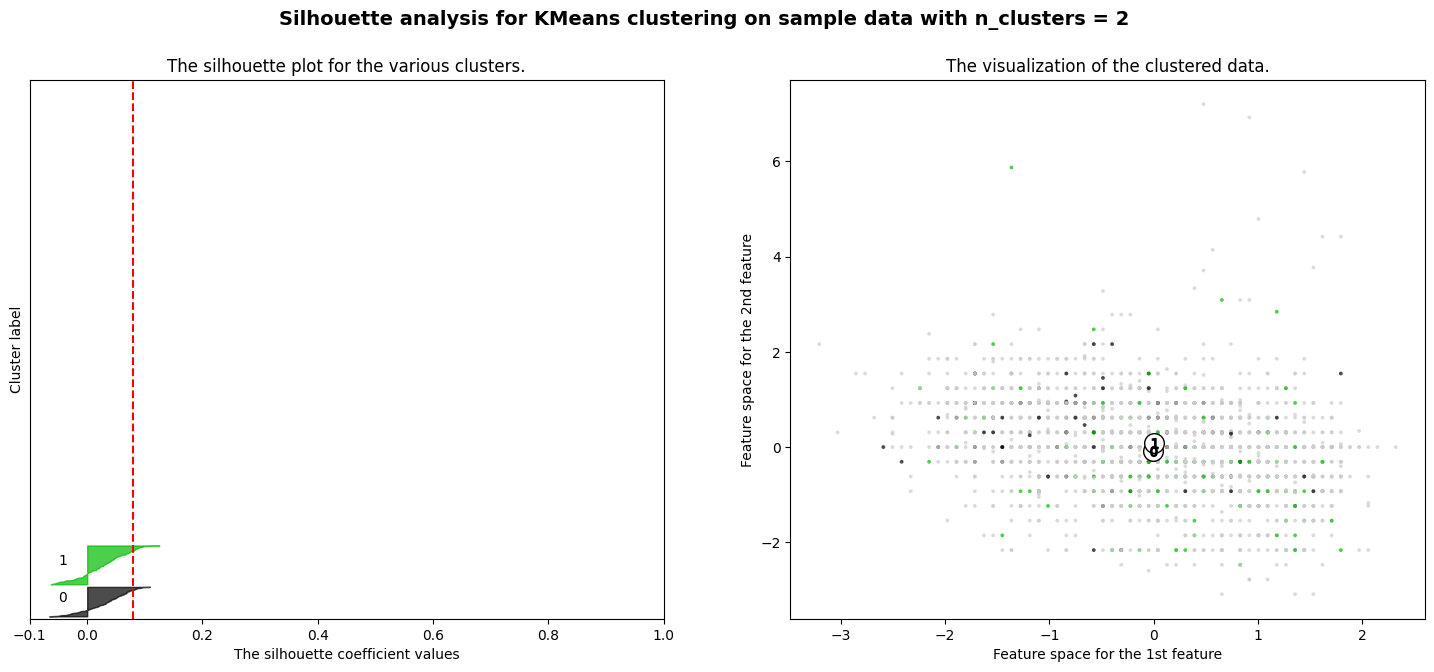

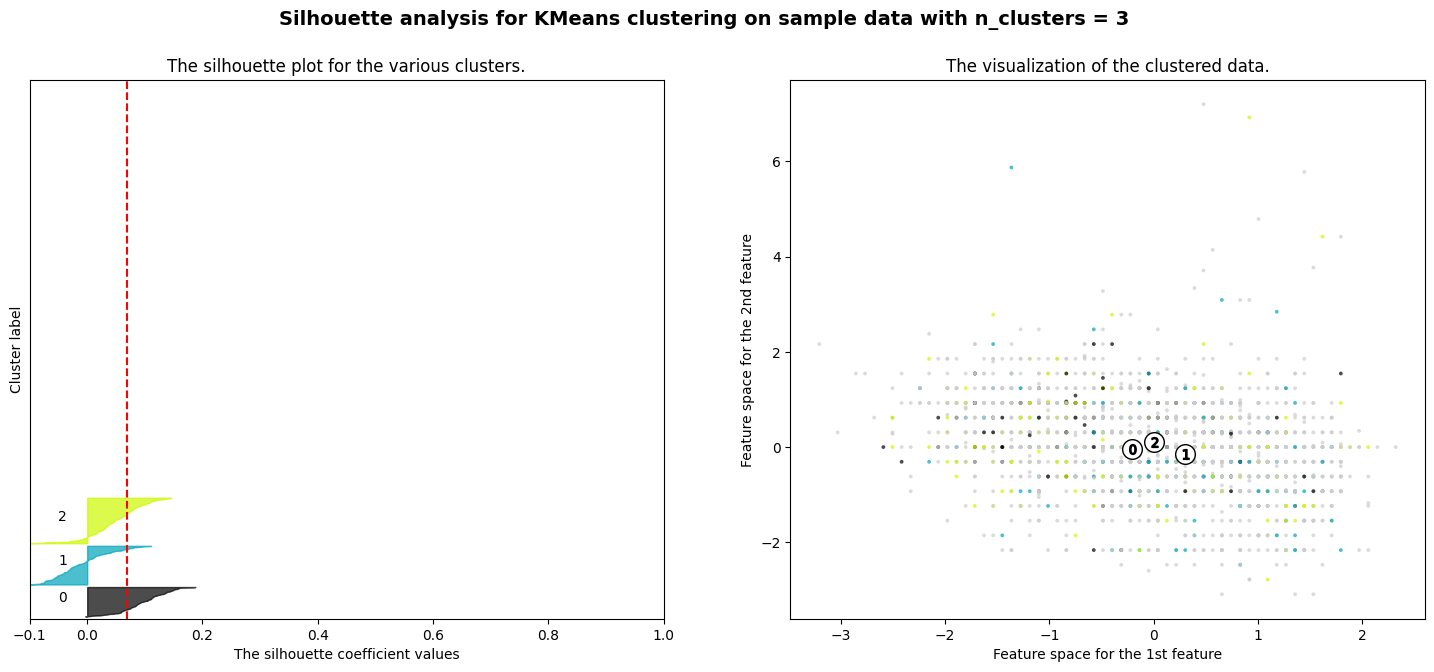

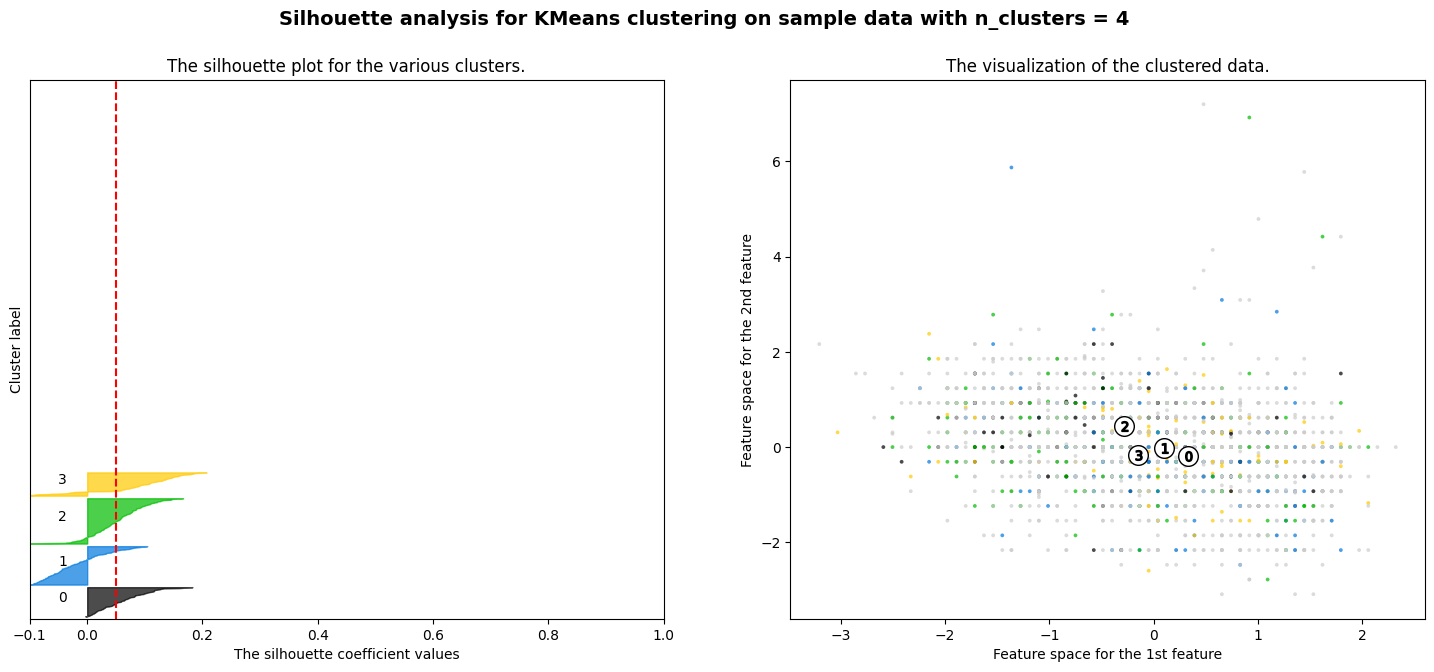

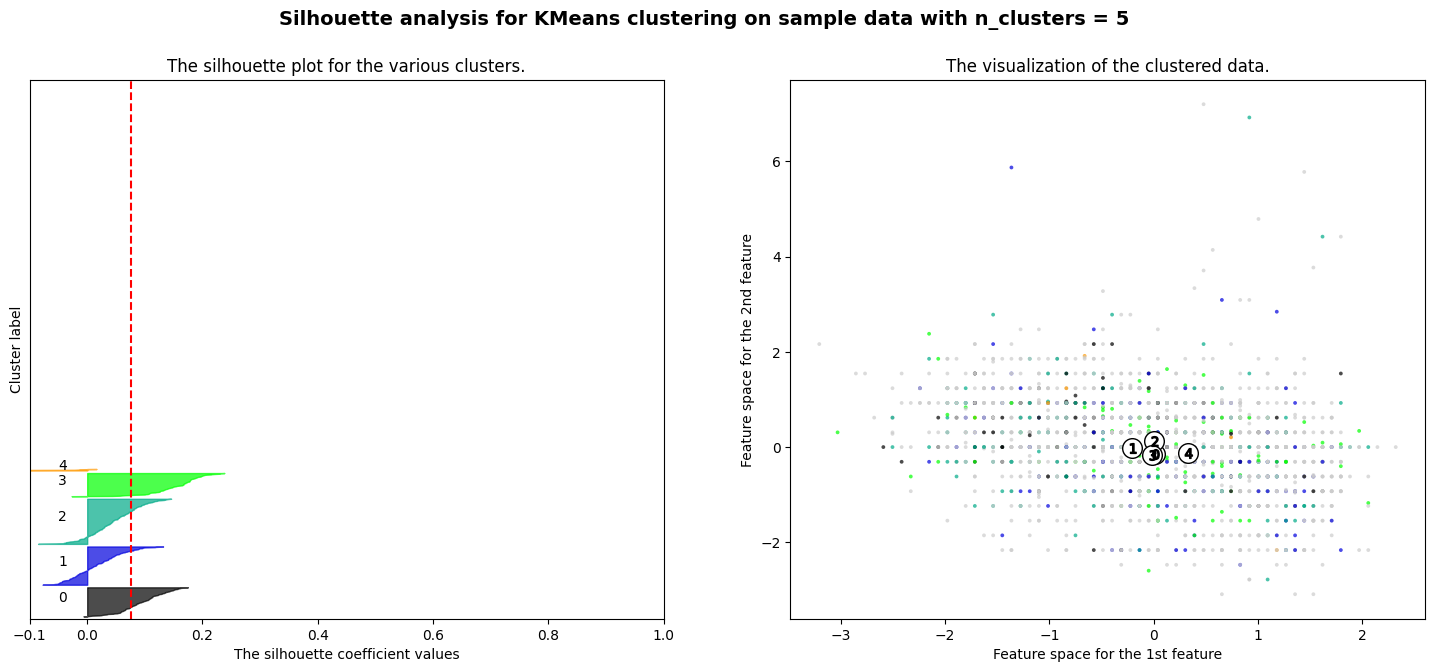

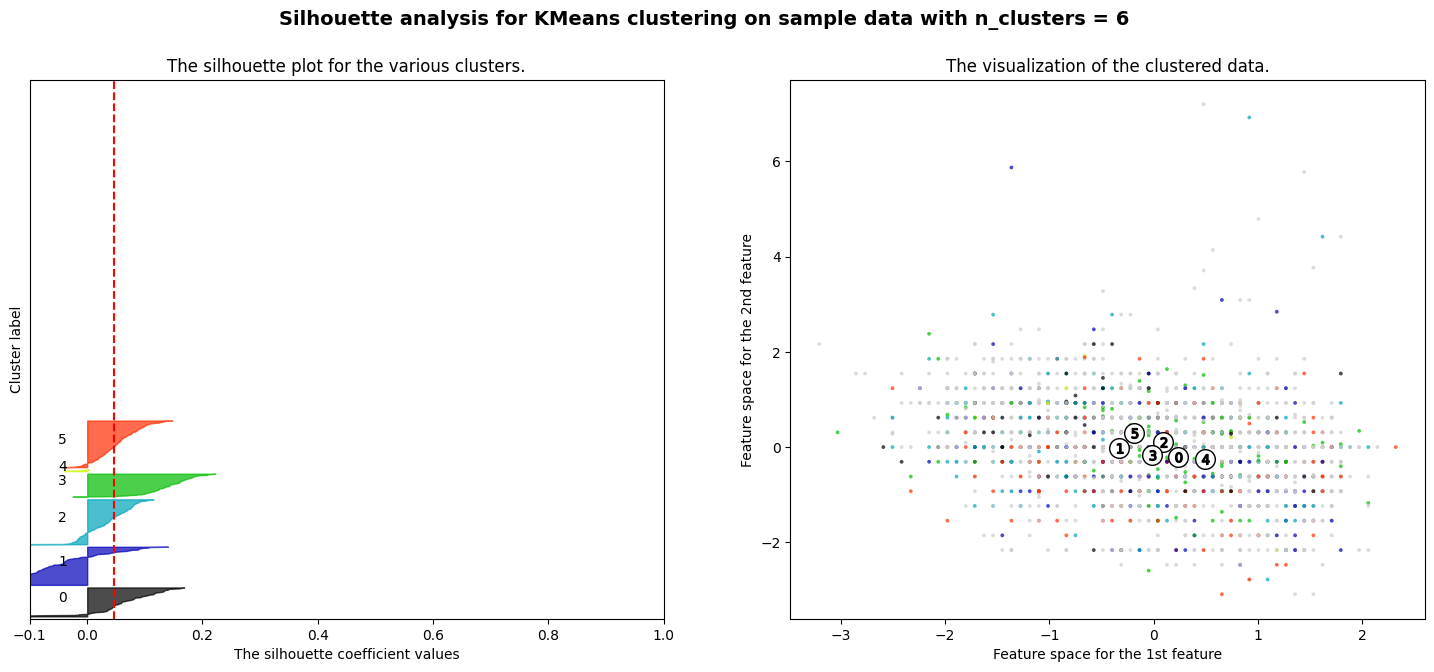

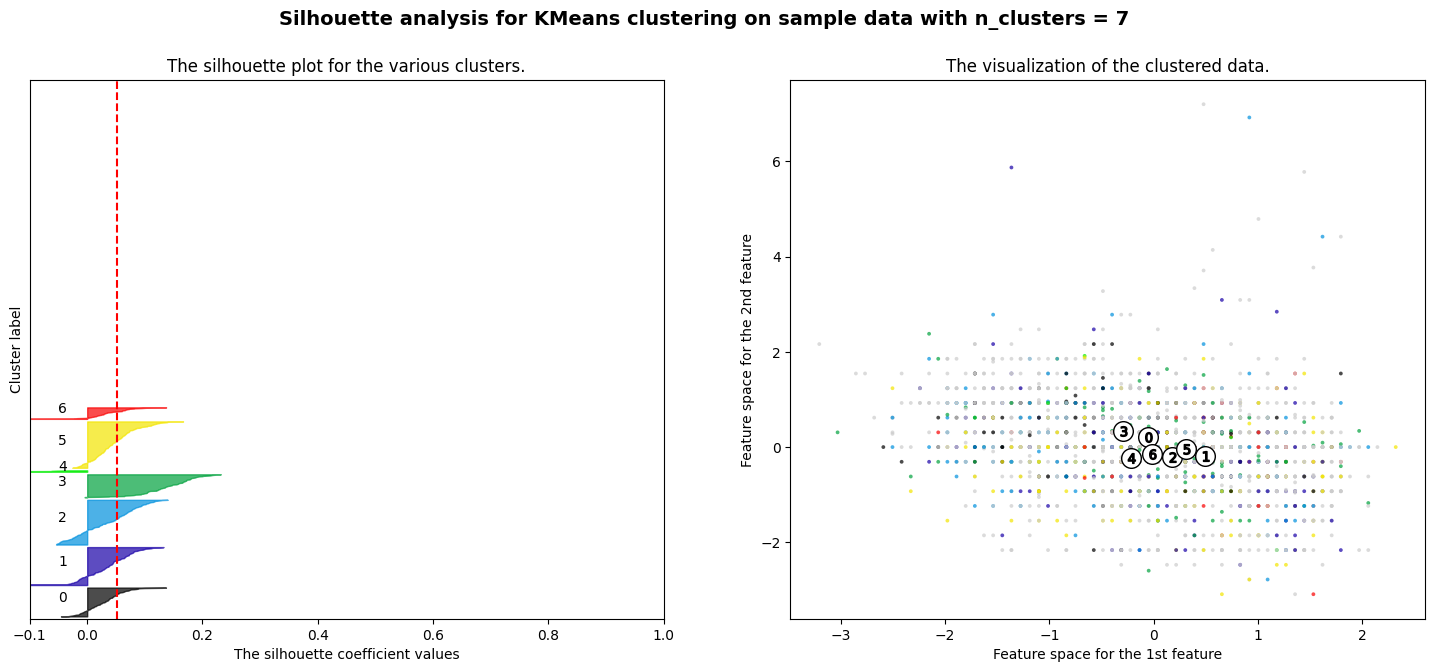

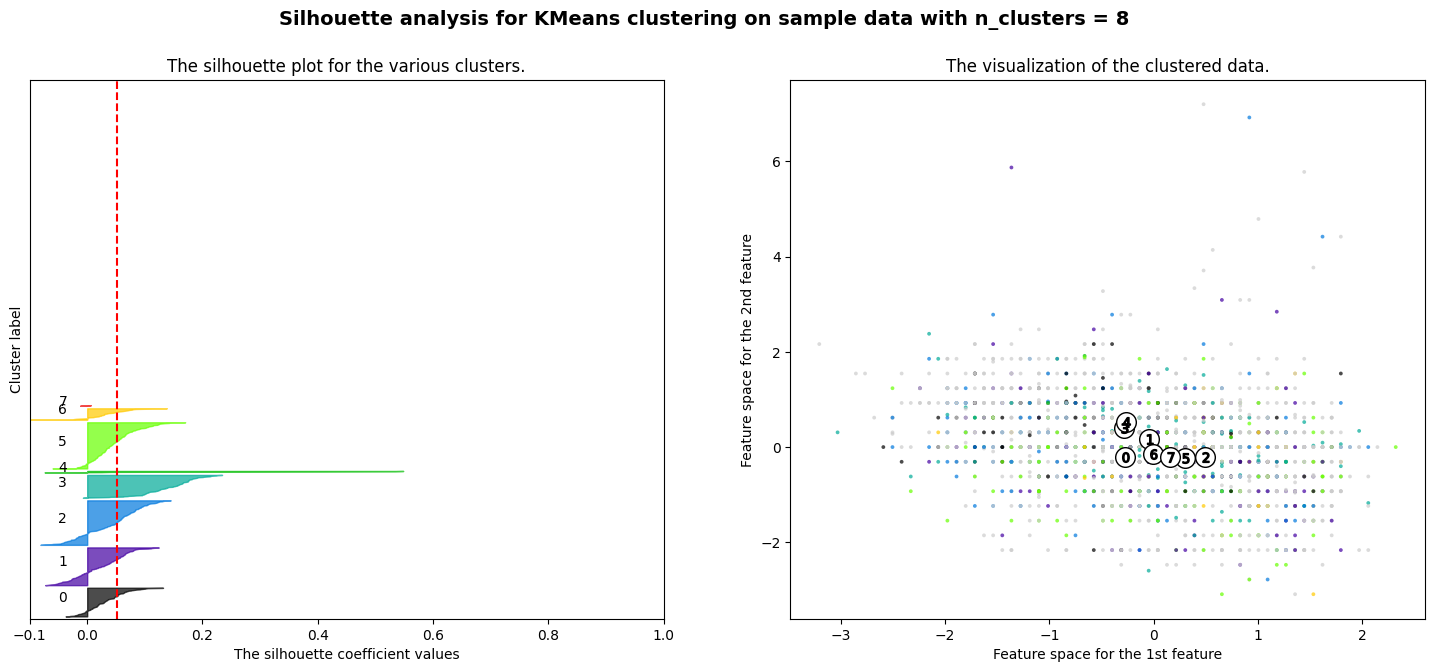

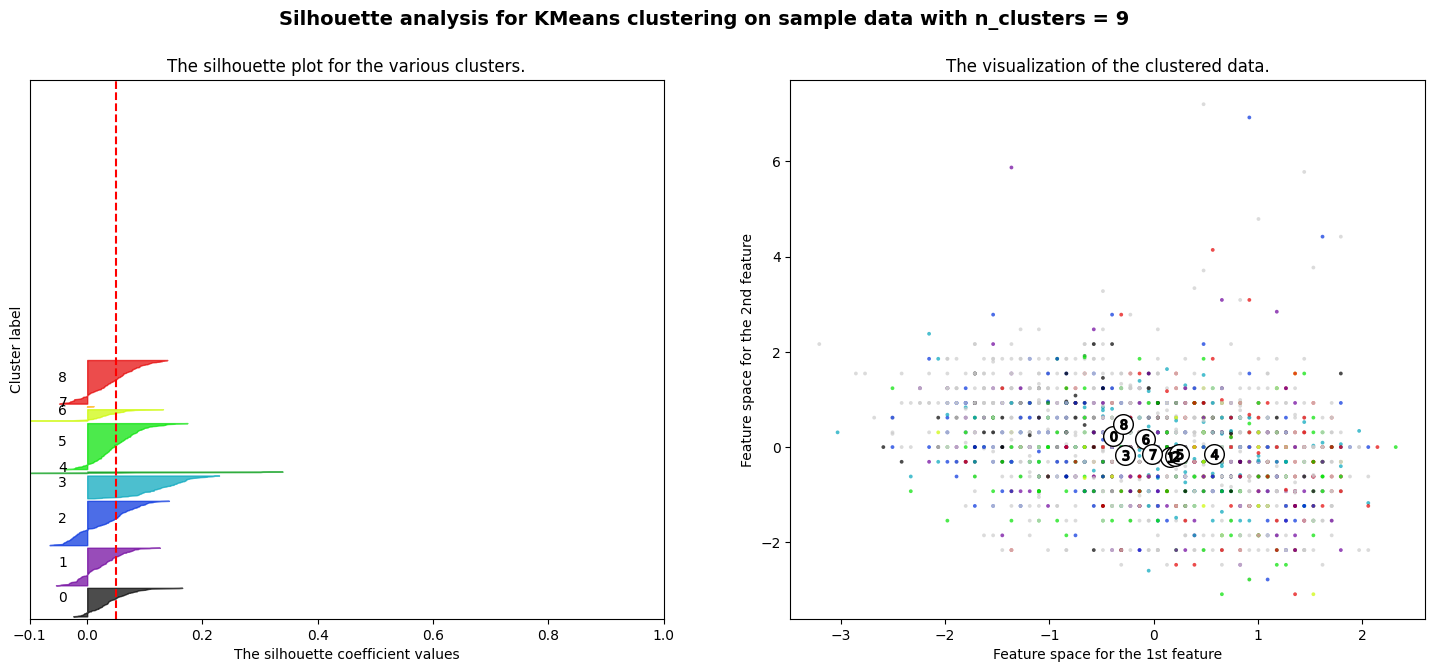

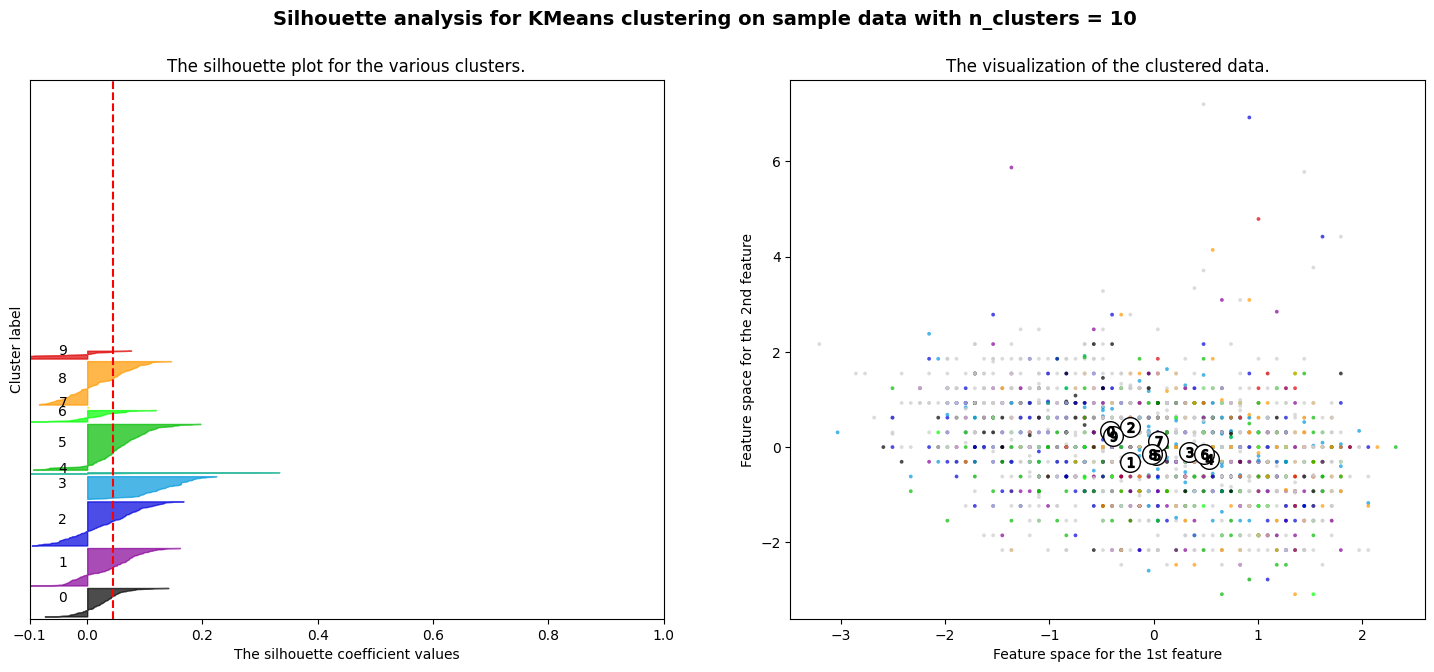

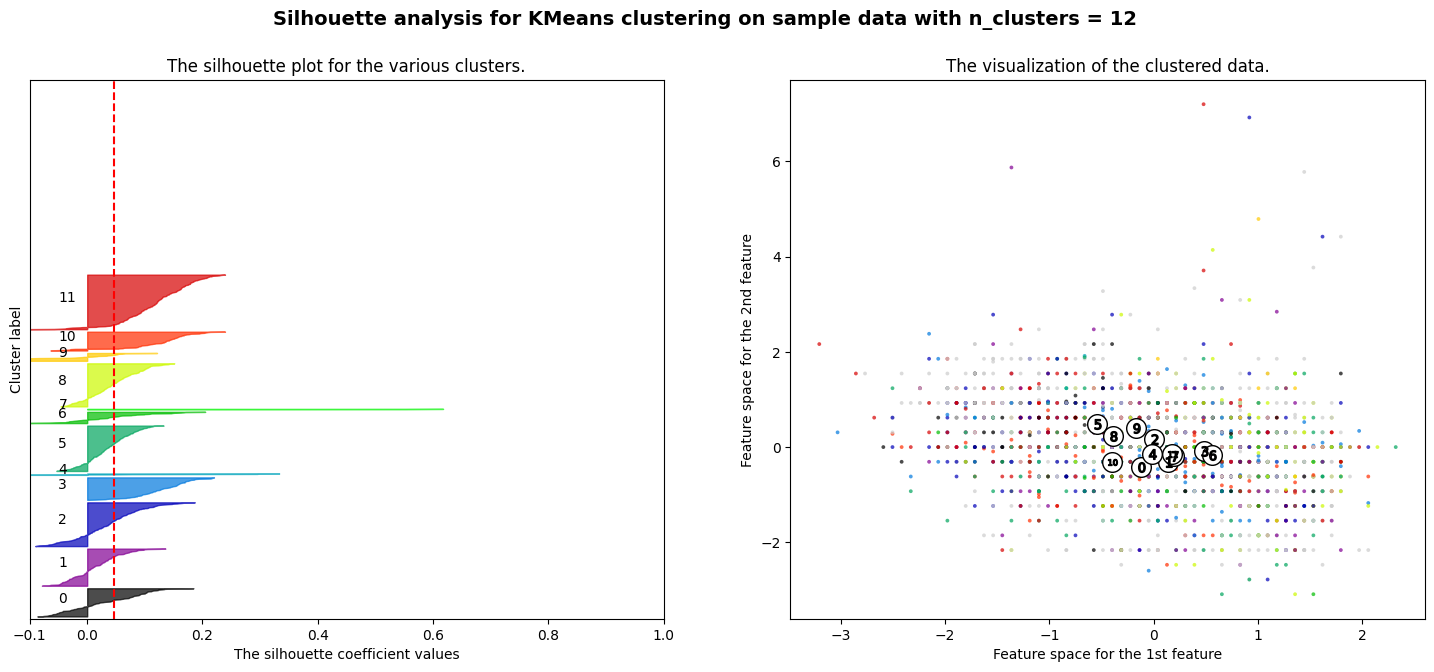

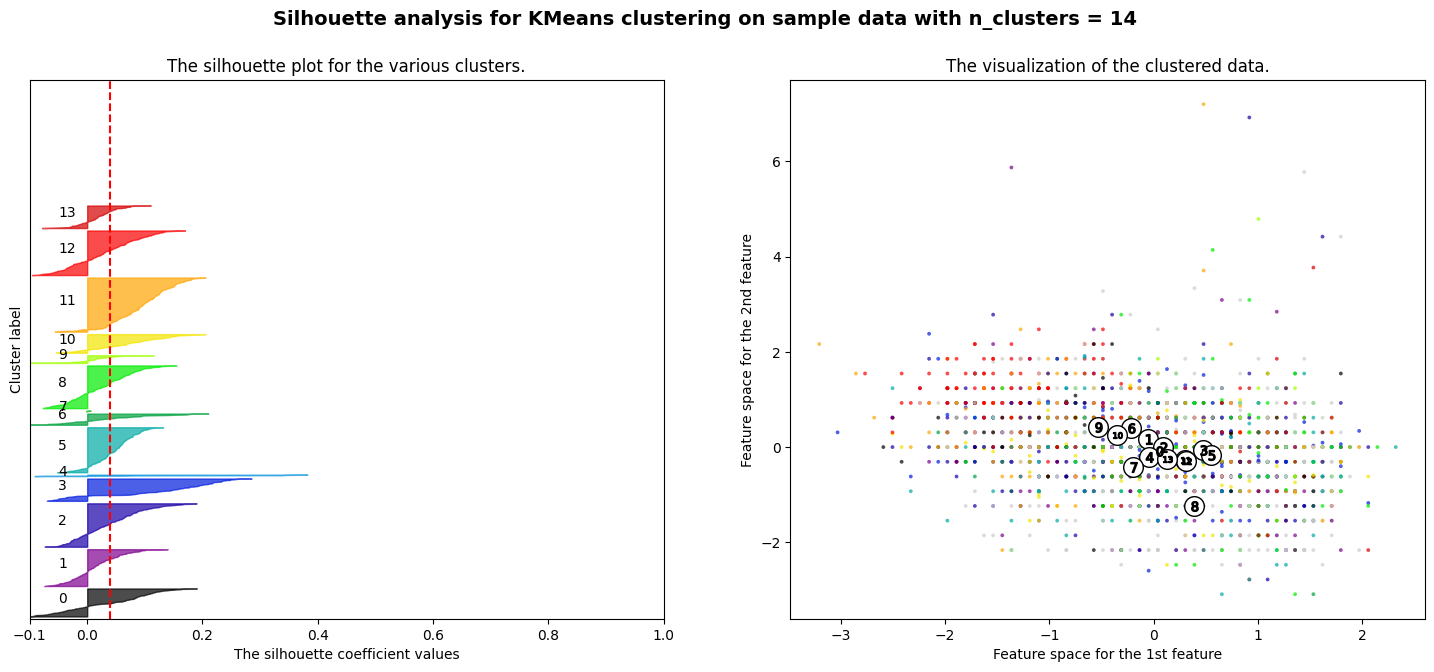

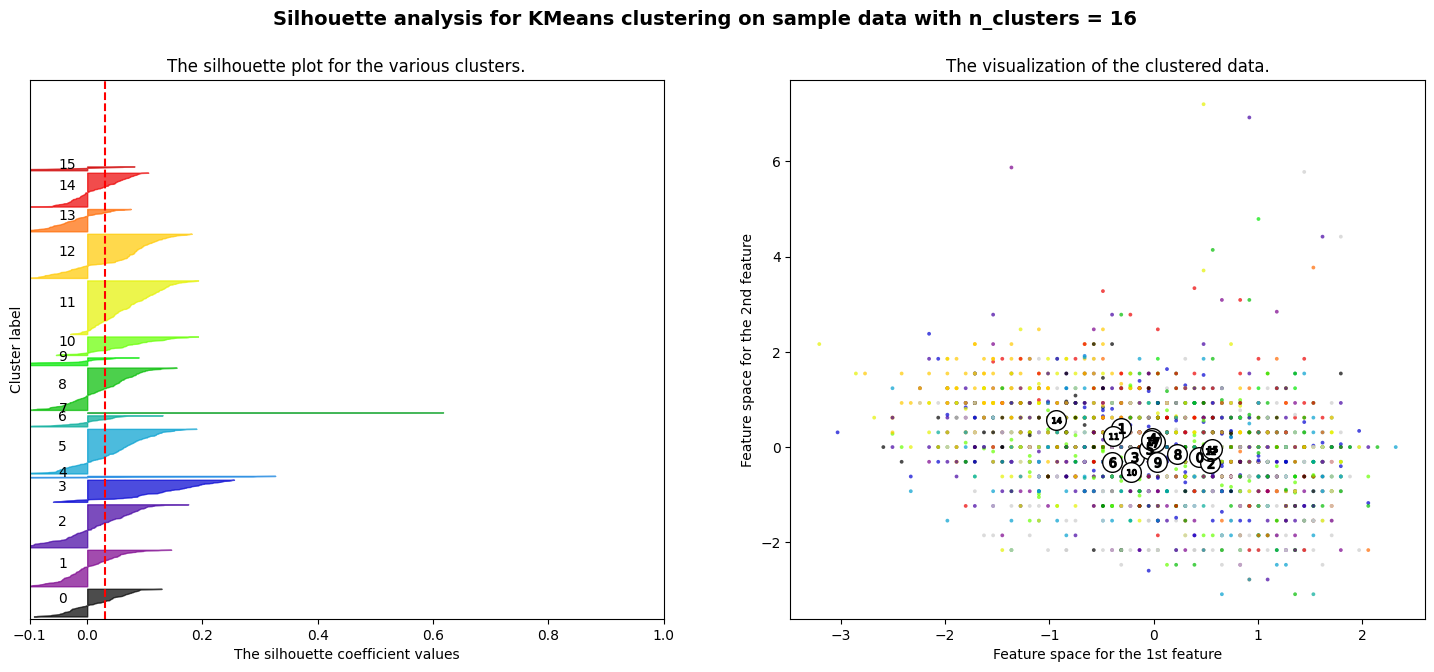

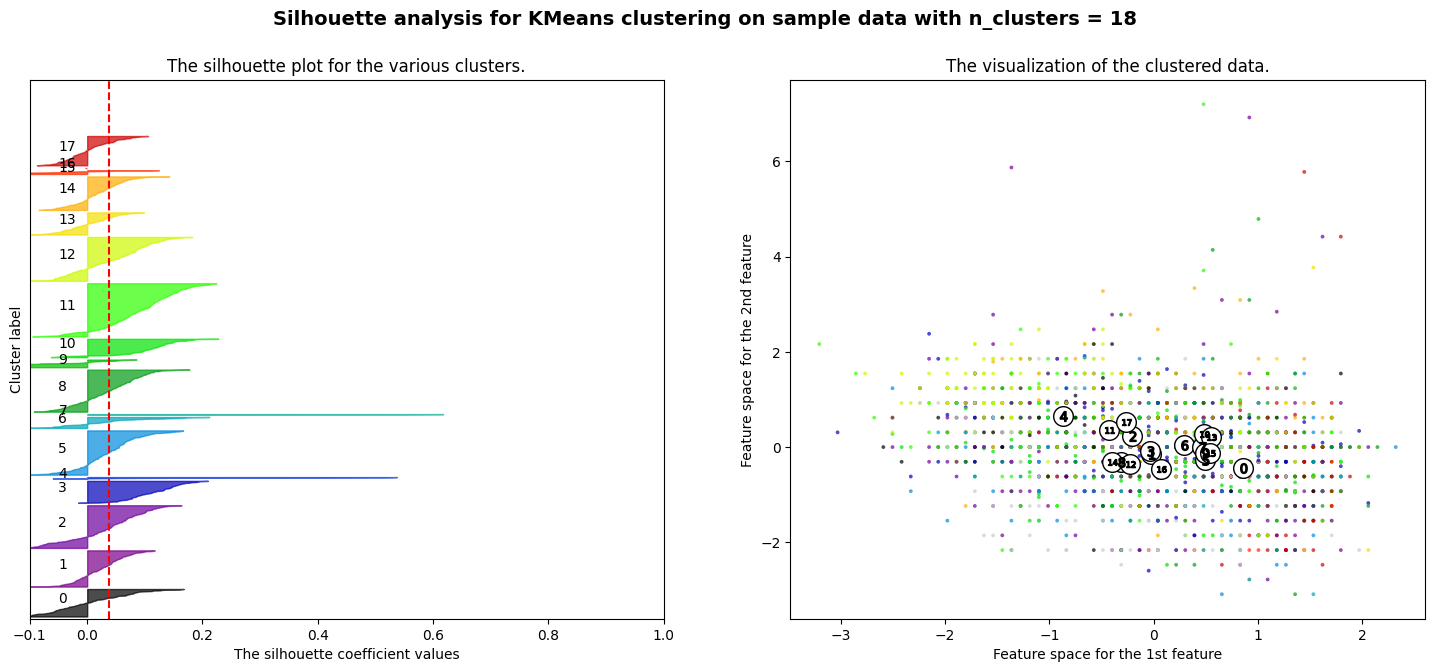

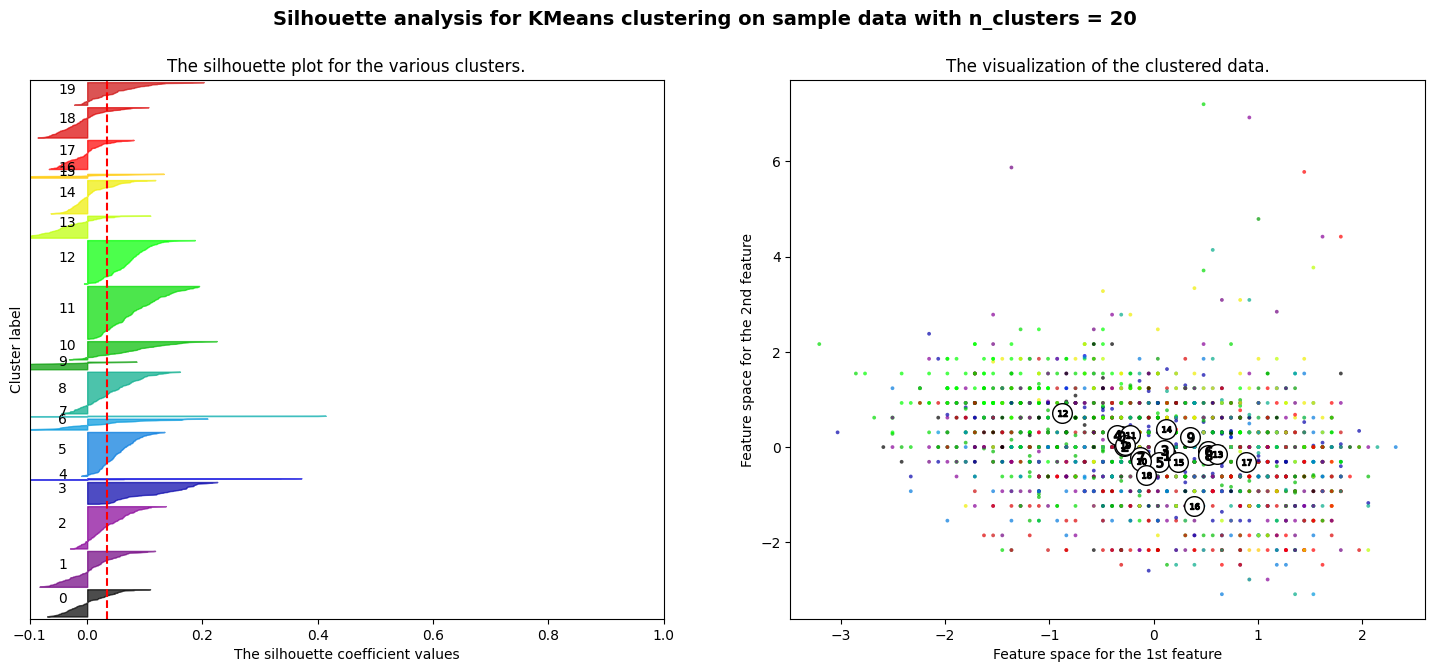

In [11]:
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,12,14,16,18,20]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(als_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels_sil = clusterer.fit_predict(als_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(als_scaled, cluster_labels_sil)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(als_scaled, cluster_labels_sil)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        als_scaled[:, 0], als_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

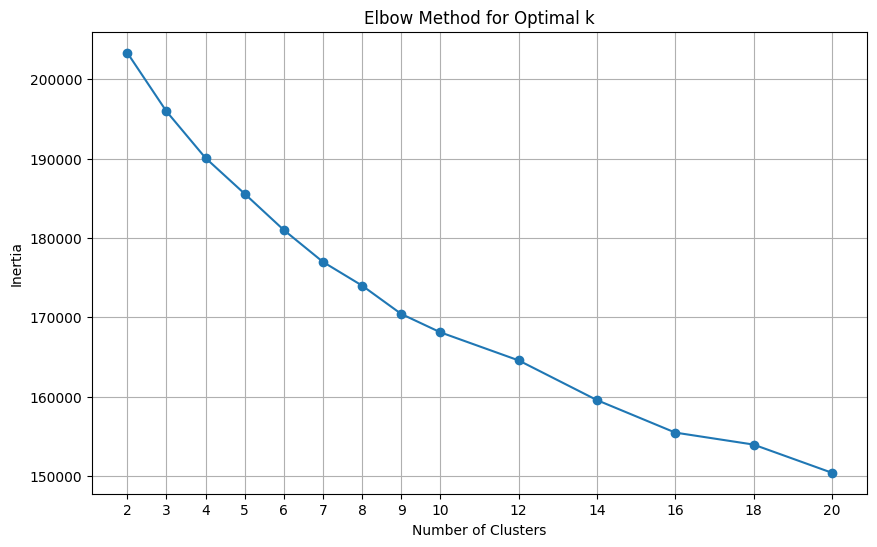

In [12]:
inertia_values = []
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,12,14,16,18,20]
for n_clusters in range_n_clusters:
    kmeans_elbow = KMeans(n_clusters=n_clusters, random_state=0).fit(als_scaled)
    inertia = kmeans_elbow.inertia_
    inertia_values.append(inertia)


# Plotting the elbow chart
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

#Use the plot created in (3) to choose on optimal number of clusters for K-means.

In [13]:
from sklearn.cluster import KMeans
kmeans_2 = KMeans(n_clusters=2, random_state=42)
clusters_2 = kmeans_2.fit_predict(als_scaled)



# Fit a PCA transformation with two features to the scaled data and scatterplot the PCA transformed data coloring each point by its cluster value.

PCA transformation is done after creating the model because it is easier to visualize how the clusters are formed in a 2 dimensional space of using principal components.  

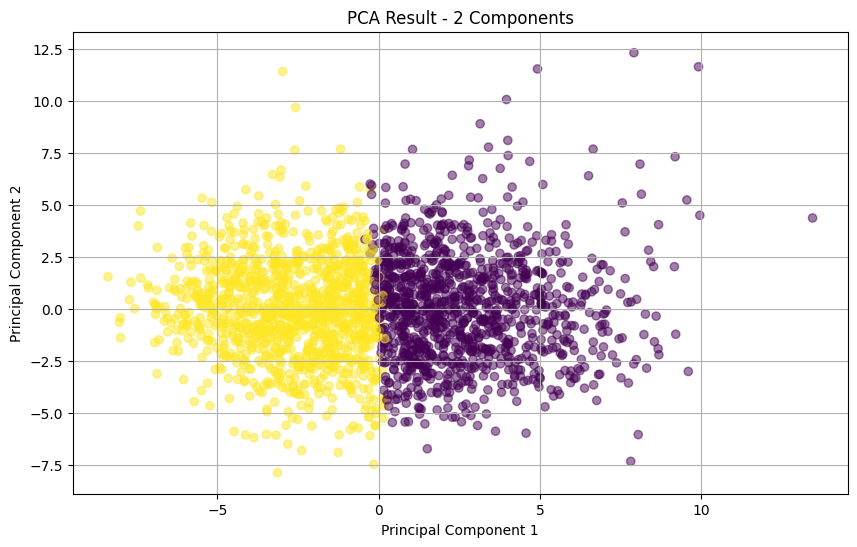

In [14]:
from sklearn.decomposition import PCA

# Fit PCA with 2 components
pca = PCA(n_components=4)
pca_result = pca.fit_transform(als_scaled)

# Display the resulting two principal components
pca_result

import matplotlib.pyplot as plt

# Create a scatter plot of the two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters_2, alpha=0.5)
plt.title('PCA Result - 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [15]:
# Eigenvalues (variance explained by each principal component)
eigenvalues = pca.explained_variance_
print("Eigenvalues:", eigenvalues,'\n\n')

# Eigenvectors (principal axes in the original space)
eigenvectors = pca.components_
print("Eigenvectors (principal axes):")
print(eigenvectors[1])



Eigenvalues: [11.22229079  6.38502206  6.16123566  4.64025173] 


Eigenvectors (principal axes):
[-7.25259424e-02  1.06507006e-01  1.28533120e-01  1.13878270e-01
 -5.24436967e-03 -5.53750671e-03 -1.82602807e-02 -1.42642337e-02
 -5.09809344e-03 -1.07269609e-02  1.74323682e-01  2.47240318e-01
  2.25525476e-01  1.28796578e-01  1.37550186e-01  2.08890306e-01
  1.64522654e-01  1.26801137e-01 -4.04365834e-02 -6.36550726e-02
 -6.57495477e-02  8.41459746e-02  2.59968610e-03 -1.14757381e-02
 -1.23603805e-02  4.55458183e-02  1.71131975e-01  1.83460956e-01
  1.45431801e-01  3.72600604e-02  8.72495811e-02  1.04742843e-01
  1.18663342e-01  2.39207182e-02  3.24960062e-02  3.48047173e-02
 -2.90475406e-05  3.03877401e-02  7.76521127e-03 -4.35887781e-03
 -2.00855639e-02  5.46080702e-02  6.63052458e-02  5.35636635e-02
  1.92828755e-02  7.76352568e-02  2.09355783e-01  7.43420192e-02
  7.42124426e-02  3.87981717e-02  6.86017207e-02 -8.56559940e-02
 -9.64613729e-02 -8.97813551e-02  2.69036139e-02  1.734638

As seen from the above values the first component PC1 is able to explain 63% of the variance. PC2 explains 37% of the variance.

# Conclusion

The dataset has been imported to dataframe and two columns were dropped, as they will not provide any insights to ALS condition of the patients.  

Heatmap for correlation has been plotted, but not able to find any highly correlated variables.  

The features has been standardized  by removing the mean and scaling to unit variance.  This is being done, as distance based algorithms are sensitive to the magnitude of data.  

The Silhoutte score and the WCSS has been used to determine optimal k value.
It has been found out that Silhoutte score is high when we have k as 2. But the same thing is not confirmed by WCSS, it says K = 20 would be more optimum.
This difference is because, when we increase the k, inertia will always be decreased. However, silhoutte score will decrease if clusters become too small or if adding more clusters causes overlap or poor separation between clusters. Silhoutte score will appropriately be penalized for increase or decrease in number of clusters.  Because of this fact, silhoutte score has been considered and 2 is chosen for k value,as it gives the highest score of 0.078.

PCA transformation is done after creating the model to visualize how the clusters are formed in a 2 dimensional space of using principal components.  

Eigen values and Eigen vectors are also calculated as seen above.